In [49]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tkinter import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import tkinter as tk
from datetime import datetime
from tkinter import Entry, Label, Button, Frame
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

In [50]:
car_data = pd.read_csv('car data.csv')

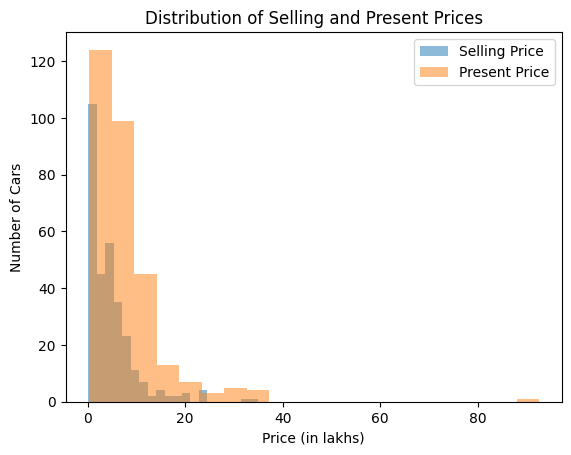

In [51]:
# Plotting the distribution of selling prices and present prices
car_data['Selling_Price'].plot(kind='hist', bins=20, alpha=0.5, label='Selling Price')
car_data['Present_Price'].plot(kind='hist', bins=20, alpha=0.5, label='Present Price')
plt.title('Distribution of Selling and Present Prices')
plt.xlabel('Price (in lakhs)')
plt.ylabel('Number of Cars')
plt.legend()
plt.show()

In [52]:
# Converting categorical variables into numerical format using one-hot encoding
car_data_encoded = pd.get_dummies(car_data, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)
car_data_encoded.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,False,True,False,True
1,sx4,2013,4.75,9.54,43000,0,True,False,False,True
2,ciaz,2017,7.25,9.85,6900,0,False,True,False,True
3,wagon r,2011,2.85,4.15,5200,0,False,True,False,True
4,swift,2014,4.60,6.87,42450,0,True,False,False,True


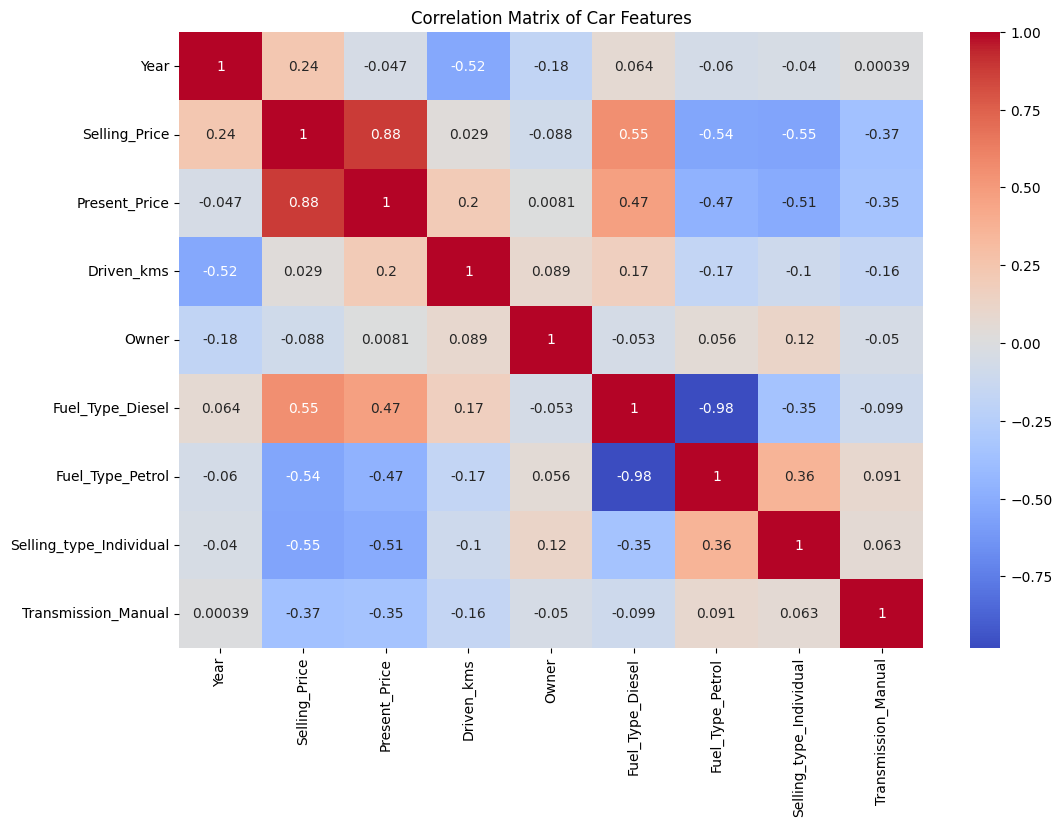

In [53]:
# Feature Selection
# Dropping the Car_Name column as it is not a numeric value and there are too many unique values to encode
car_data_encoded.drop('Car_Name', axis=1, inplace=True)

# Using correlation matrix to identify the most relevant features
correlation_matrix = car_data_encoded.corr()

# Plotting the correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Car Features')
plt.show()

In [54]:

# Defining the features and target variable
X = car_data_encoded.drop('Selling_Price', axis=1)
y = car_data_encoded['Selling_Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the resulting datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((240, 8), (61, 8), (240,), (61,))

In [55]:
# Training the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
(mae, mse, r2)

(0.5971295081967213, 0.8209857844262285, 0.9643601062650229)

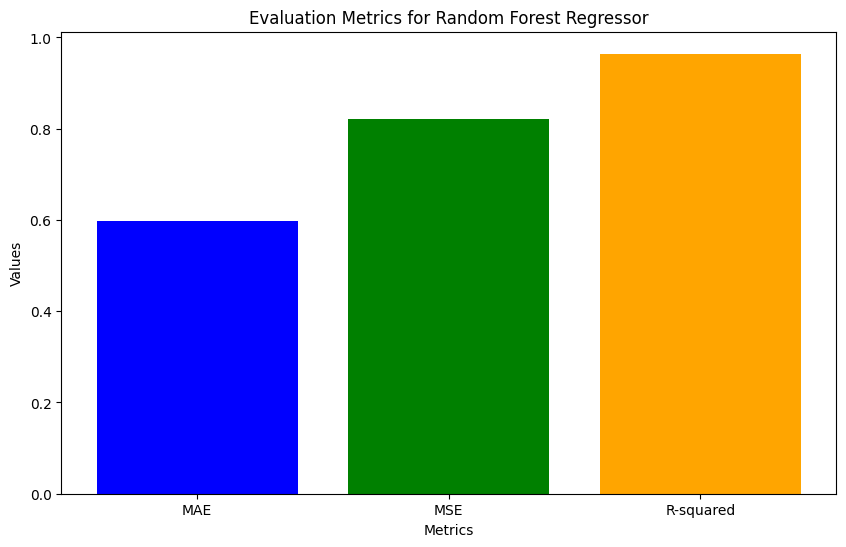

In [56]:


# Create a bar plot for the evaluation metrics
metrics = ['MAE', 'MSE', 'R-squared']
values = [mae, mse, r2]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.title('Evaluation Metrics for Random Forest Regressor')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

In [57]:

car_data = pd.read_csv('car data.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
car_data['Fuel_Type'] = label_encoder.fit_transform(car_data['Fuel_Type'])
car_data['Transmission'] = label_encoder.fit_transform(car_data['Transmission'])
car_data['Car_Name'] = label_encoder.fit_transform(car_data['Car_Name'])  # Encode Car_Name
car_data['Selling_type'] = label_encoder.fit_transform(car_data['Selling_type'])  # Encode Selling_type

# Create a user interface to get input for car type and year
root = Tk()
root.title("Car Price Prediction")

# Create dropdown menus for car type, fuel type, and transmission
car_type_label = Label(root, text="Choose Car Type:")
car_type_label.pack()
car_type = StringVar(root)
car_type.set(car_data['Car_Name'].unique()[0])  # Set default value
car_type_dropdown = OptionMenu(root, car_type, *car_data['Car_Name'].unique())
car_type_dropdown.pack()

fuel_type_label = Label(root, text="Choose Fuel Type:")
fuel_type_label.pack()
fuel_type = StringVar(root)
fuel_type.set(car_data['Fuel_Type'].unique()[0])  # Set default value
fuel_type_dropdown = OptionMenu(root, fuel_type, *car_data['Fuel_Type'].unique())
fuel_type_dropdown.pack()

transmission_label = Label(root, text="Choose Transmission:")
transmission_label.pack()
transmission = StringVar(root)
transmission.set(car_data['Transmission'].unique()[0])  # Set default value
transmission_dropdown = OptionMenu(root, transmission, *car_data['Transmission'].unique())
transmission_dropdown.pack()

year_label = Label(root, text="Enter Year:")
year_label.pack()
year = Entry(root)
year.pack()

# Split the data into features and target variable
X = car_data[['Car_Name', 'Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]
y = car_data['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the random forest regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Function to predict car price
def predict_price():
    try:
        car = car_type.get()
        fuel = fuel_type.get()
        trans = transmission.get()
        input_data = [[car, int(year.get()), 0, 0, fuel, 0, trans, 0]]
        predicted_price = model.predict(input_data)
        result_label.config(text=f"Predicted Price: {predicted_price[0]}")
    except Exception as e:
        result_label.config(text=f"Error predicting price: {str(e)}")
        print("Error predicting price:", e)

# Create a button to trigger the prediction
predict_button = Button(root, text="Predict Price", command=predict_price)
predict_button.pack()

# Display the predicted price
result_label = Label(root, text="")
result_label.pack()

root.mainloop()


c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
